Credits/Course URL: https://www.udemy.com/course/machinelearning/

## Random Forest Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

#### Reading the data

In [2]:
data = pd.read_csv(r'E:\Github\Datasets\Social_Network_Ads.csv')

In [3]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


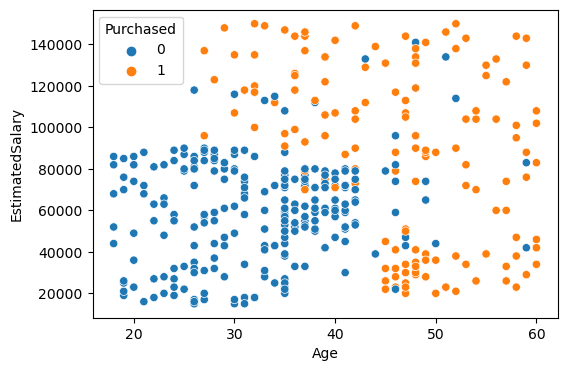

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data = data);

#### Splitting the dataset

In [6]:
X = data.drop('Purchased', axis = 1).values
y = data['Purchased'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
X_train[:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]], dtype=int64)

In [9]:
X_test[:5]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000],
       [   30, 79000],
       [   35, 50000]], dtype=int64)

In [10]:
X_train.shape, y_train.shape

((320, 2), (320,))

In [11]:
X_test.shape, y_test.shape

((80, 2), (80,))

#### Feature Scaling

In [12]:
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train[:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [15]:
X_test[:5]

array([[-0.79895082,  0.49460758],
       [-0.02126485, -0.57735906],
       [-0.31289709,  0.14694273],
       [-0.79895082,  0.26283101],
       [-0.31289709, -0.57735906]])

#### Building Decision Tree Classifier

In [67]:
trees_count = range(50,751,50)

train_acc_list = []
test_acc_list = []


for tree in trees_count:
    
    clf = RandomForestClassifier(n_estimators=tree, criterion='entropy', random_state=0)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    train_acc = round((accuracy_score(y_train, y_pred_train)*100),3)
    test_acc = round((accuracy_score(y_test, y_pred_test)*100),3)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    

In [68]:
rf_accuracy_df  = pd.DataFrame((train_acc_list, test_acc_list), 
                                index = ['rf_train_accuracy', 'rf_test_accuracy'], 
                                columns = trees_count)

rf_accuracy_df 

,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750
rf_train_accuracy,99.688,99.688,99.688,99.688,99.688,99.688,99.688,99.688,99.688,99.688,99.688,99.688,99.688,99.688,99.688
rf_test_accuracy,92.500,93.750,93.750,92.500,93.750,93.750,93.750,93.750,93.750,93.750,93.750,93.750,93.750,93.750,93.750


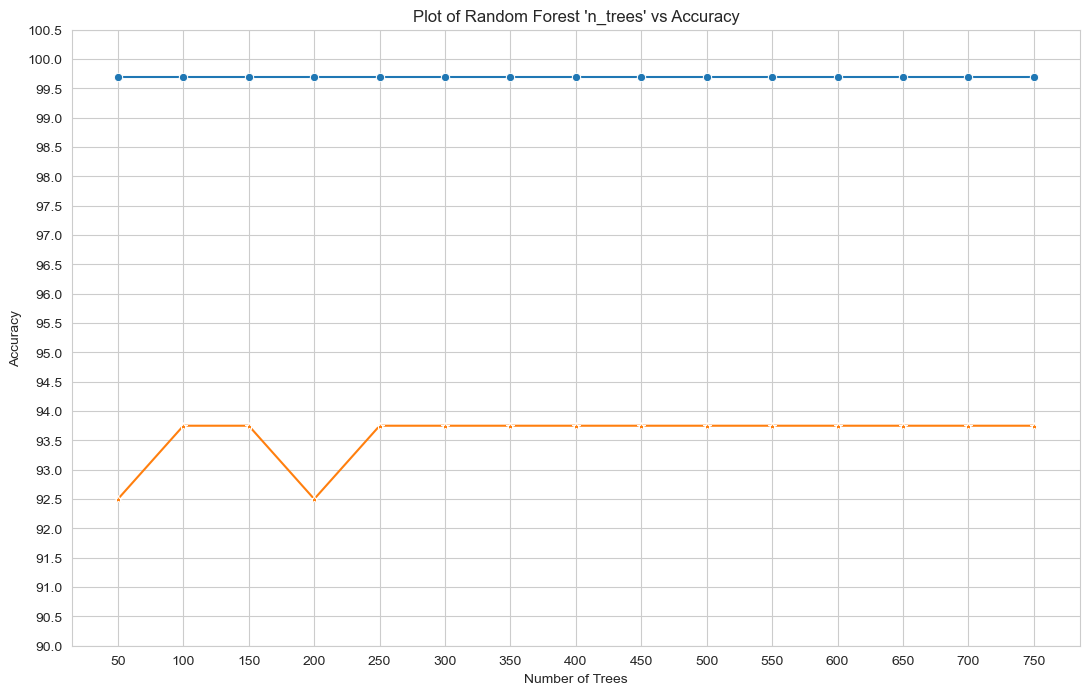

In [69]:
sns.set_style("whitegrid")

plt.figure(figsize=(13,8))
sns.lineplot(y = train_acc_list, x = trees_count, marker='o')
sns.lineplot(y = test_acc_list, x = trees_count, marker='*')
plt.xticks(trees_count)
plt.yticks(np.arange(90,101,0.5))
plt.title("Plot of Random Forest 'n_trees' vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees")
plt.show()

Best number of trees is obtained at n=100

In [70]:
rf_classifier = RandomForestClassifier(n_estimators=350, criterion='entropy')

In [71]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=350)

In [72]:
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

In [73]:
actual_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
actual_pred_df.head(7)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0


#### Classification Metrics on obtained results

In [74]:
print('\n **************** Classification Report - Training Data **************** \n')
print(classification_report(y_train, y_pred_train))


 **************** Classification Report - Training Data **************** 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       199
           1       1.00      0.99      1.00       121

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320




 **************** Confusion Martix - Training Data **************** 



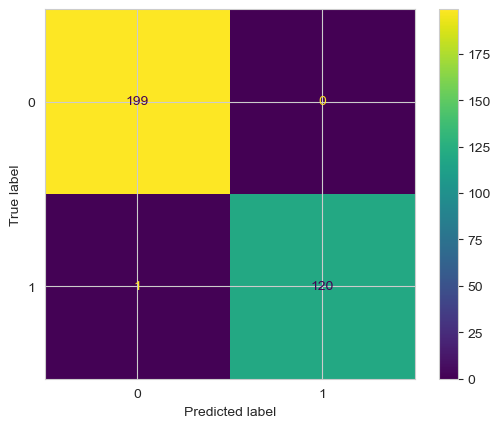

In [75]:
print('\n **************** Confusion Martix - Training Data **************** \n')
cm = confusion_matrix(y_train, y_pred_train, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

In [76]:
tn, fp, fn, tp = cm.ravel()

print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

True Negative: 199
False Positive: 0
False Negative: 1
True Positive: 120


In [77]:
print('\n **************** Classification Report - Test Data **************** \n')
print(classification_report(y_test, y_pred_test))


 **************** Classification Report - Test Data **************** 

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.87      0.91      0.89        22

    accuracy                           0.94        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80




 **************** Confusion Martix - Test Data **************** 



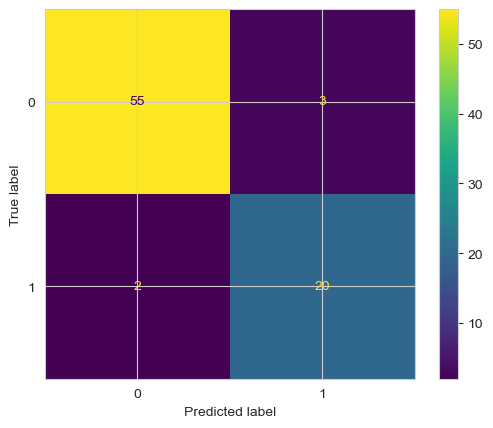

In [78]:
print('\n **************** Confusion Martix - Test Data **************** \n')
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

#### Plotting decision regions

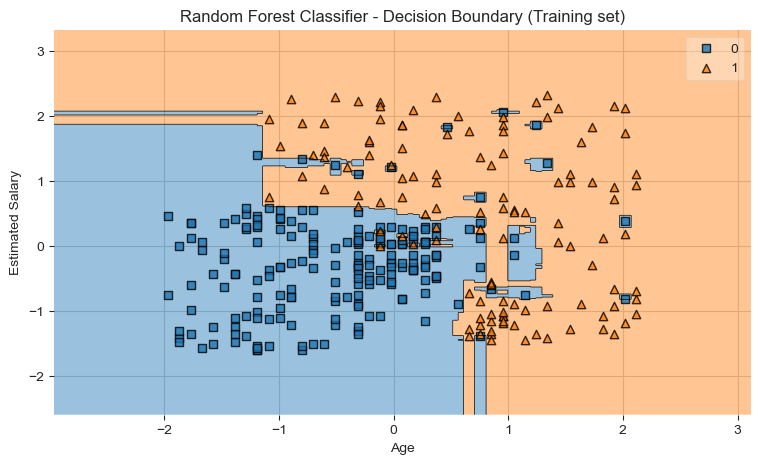

In [79]:
plt.figure(figsize=(9,5))

plot_decision_regions(X_train, y_train, 
                      clf=rf_classifier, 
                      legend=1, 
                      X_highlight=None)

# Adding axes annotations
plt.title('Random Forest Classifier - Decision Boundary (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
#plt.legend()
plt.show();

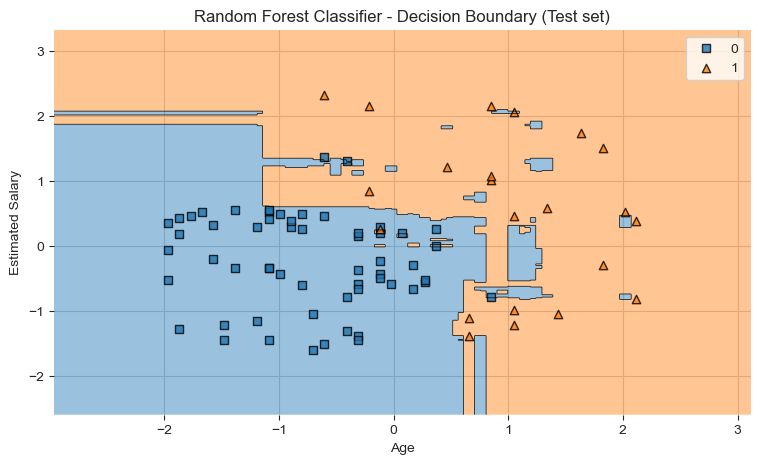

In [80]:
plt.figure(figsize=(9,5))

plot_decision_regions(X_test, y_test, 
                      clf=rf_classifier, 
                      legend=1, 
                      X_highlight=None)

plt.title('Random Forest Classifier - Decision Boundary (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()